In [67]:
import pandas as pd
import os
#data_frame = pd.read_csv('./Sales_Data/Sales_April_2019.csv')


##Marge the all month sales data

In [68]:
all_file = [f for f in os.listdir('./Sales_Data')]
all_data = pd.DataFrame()
for x in all_file:
    month_data = pd.read_csv('./Sales_Data/'+x)
    all_data = pd.concat([all_data , month_data])
#all_data.head()
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [69]:
all_data.to_csv("all_data.csv",index_label='false')

In [70]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1,14.95,09/07/19 09:59,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1,14.95,09/02/19 14:16,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1,400.0,09/06/19 16:45,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1,11.99,09/01/19 22:03,"446 9th St, San Francisco, CA 94016"


## What was the best sale for month

In [71]:
all_data.shape

(186850, 6)

# Dropna

In [72]:
all_data = all_data.dropna(how='all')
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
##Drop Or month rows

In [73]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data = all_data[all_data['month'] != 'Or']

In [74]:
##Change type of month column into int

In [77]:
all_data['month'] = pd.to_numeric(all_data['month'])
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [78]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


type convert

In [85]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [87]:
all_data['sale'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [96]:
result = all_data.groupby('month').sum()
result['sale']

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sale, dtype: float64

In [91]:
import matplotlib.pylab as plt

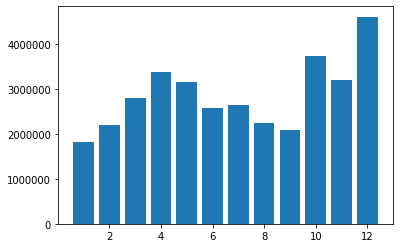

In [97]:
total_month = range(1,13)
plt.bar(total_month,result['sale'])
plt.show()

In [99]:
all_data.describe()

,Quantity Ordered,Price Each,month,sale
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917
std,0.442793,332.731330,3.502996,332.919771
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,4.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,10.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000
